In [19]:
import pandas as pd
from dfply import *
import matplotlib.pyplot as plt

# Loading the data set

In [27]:
data = pd.read_csv("https://www.opengov-muenchen.de/dataset/8d6c8251-7956-4f92-8c96-f79106aab828/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2/download/oktoberfestgesamt19852018.csv", index_col="jahr", parse_dates=True)

In [29]:
data.head()

,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
jahr,,,,,,,
1985-01-01,16,7.1,444,3.20,54541,4.77,629520
1986-01-01,16,6.7,419,3.30,53807,3.92,698137
1987-01-01,16,6.5,406,3.37,51842,3.98,732859
1988-01-01,16,5.7,356,3.45,50951,4.19,720139
1989-01-01,16,6.2,388,3.60,51241,4.22,775674


## Some Descriptives

In [30]:
#Calculating the averages 
data >> select_numeric_cols >> meandf

,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,16.294118,6.314706,388.0,6.728235,61744.588235,7.457941,575947.852941


In [78]:
data >> \
select_numeric_cols>>\
summarise_each([np.mean, min, max], 'besucher_gesamt','bier_konsum','hendl_konsum') 

,besucher_gesamt_mean,besucher_gesamt_min,besucher_gesamt_max,bier_konsum_mean,bier_konsum_min,bier_konsum_max,hendl_konsum_mean,hendl_konsum_min,hendl_konsum_max
0,6.314706,5.5,7.1,61744.588235,48698,79225,575947.852941,351705,807710


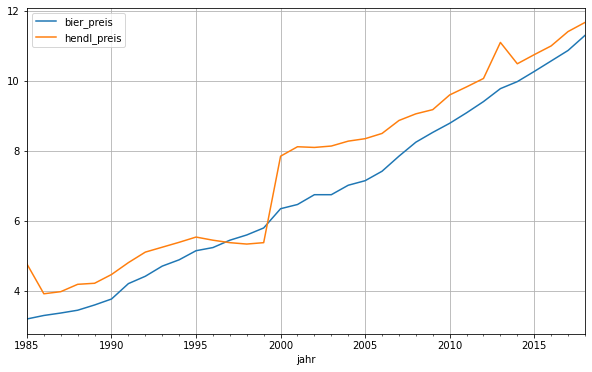

In [35]:
#Plotting beer and chicken prices over the time period
data[["bier_preis","hendl_preis"]].plot(figsize=(10,6),grid=True);

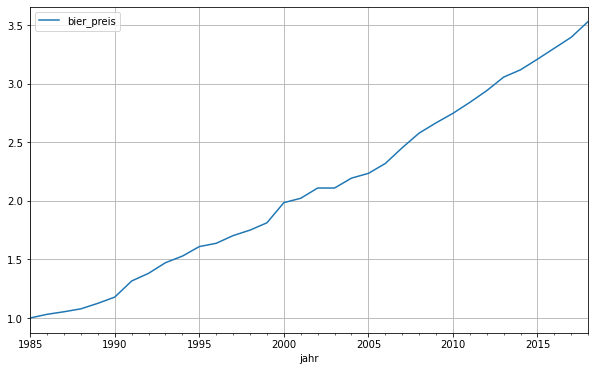

In [48]:
#Plotting a beer price index with base year (1985)
(data[["bier_preis"]]/data[["bier_preis"]].iloc[0]).plot(figsize=(10,6),grid=True);

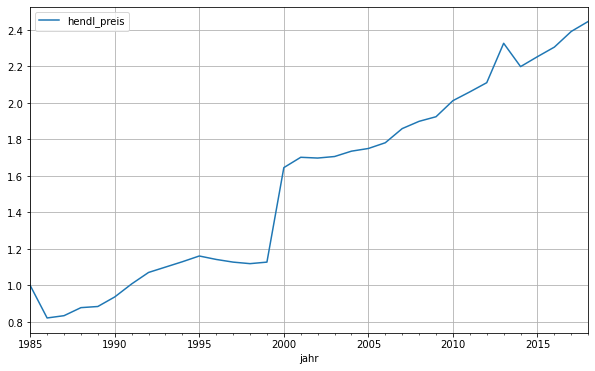

In [57]:
#Plotting the chicken price index with base year (1985)
(data[["hendl_preis"]]/data[["hendl_preis"]].iloc[0]).plot(figsize=(10,6),grid=True);

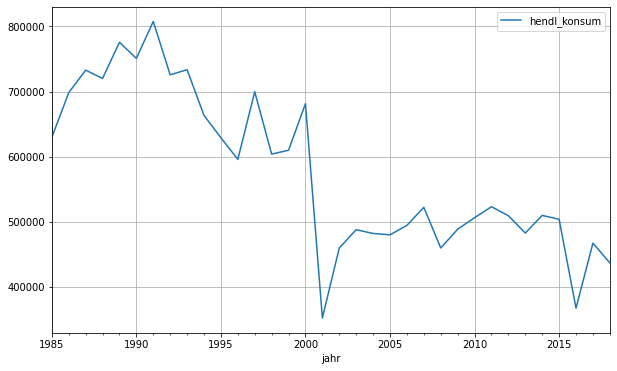

In [37]:
#Plotting chicken consumpion over the time period
data[["hendl_konsum"]].plot(figsize=(10,6),grid=True);

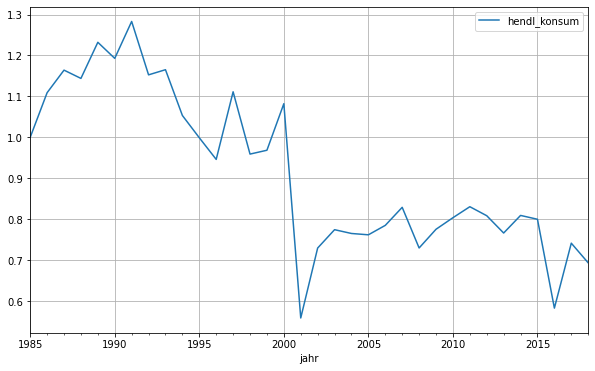

In [47]:
#Plotting chicken consumption index with base year (1985)
(data[["hendl_konsum"]]/data[["hendl_konsum"]].iloc[0]).plot(figsize=(10,6), grid=True);

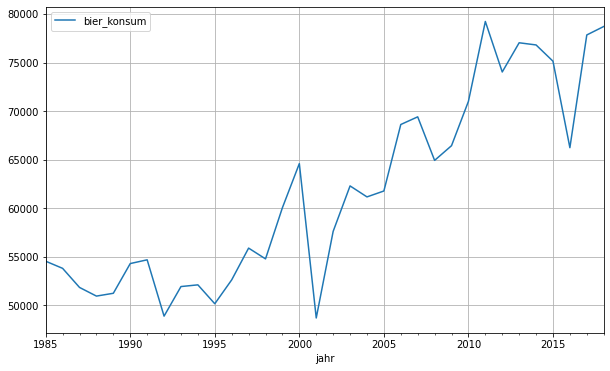

In [39]:
#Plotting beer consumpion over the time period
data[["bier_konsum"]].plot(figsize=(10,6),grid=True);

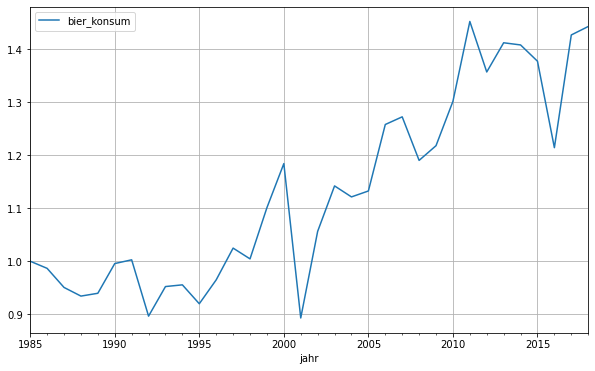

In [46]:
#Plotting beer consumption index with base year (1985)
(data[["bier_konsum"]]/data[["bier_konsum"]].iloc[0]).plot(figsize=(10,6), grid=True);

In [79]:
#Calculating the consumptions per capita

In [83]:
data >>= mutate(chicken_per_capita = X.hendl_konsum/(X.besucher_gesamt*1000000),
               beer_per_capita = X.bier_konsum*100/(X.besucher_gesamt*1000000))

In [84]:
data["chicken_per_C"]

,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum,chicken_per_capita,beer_per_capita
jahr,,,,,,,,,
1985-01-01,16,7.1,444,3.20,54541,4.77,629520,0.088665,0.768183
1986-01-01,16,6.7,419,3.30,53807,3.92,698137,0.104200,0.803090
1987-01-01,16,6.5,406,3.37,51842,3.98,732859,0.112748,0.797569
1988-01-01,16,5.7,356,3.45,50951,4.19,720139,0.126340,0.893877
1989-01-01,16,6.2,388,3.60,51241,4.22,775674,0.125109,0.826468
1990-01-01,16,6.7,419,3.77,54300,4.47,750947,0.112082,0.810448
1991-01-01,16,6.4,400,4.21,54686,4.81,807710,0.126205,0.854469
1992-01-01,16,5.9,369,4.42,48888,5.11,725612,0.122985,0.828610
1993-01-01,16,6.5,406,4.71,51933,5.25,733517,0.112849,0.798969
